In [ ]:
import gymnasium as gym
import numpy as np
from agents.q_agents import TargetChaser
from gymnasium.wrappers import RecordEpisodeStatistics
from tqdm.notebook import tqdm
from utils.plot import plot_smooth_curve

import matplotlib.pyplot as plt

In [ ]:
gym.register(
    id="simpleenvs/GridWorld-v0",
    entry_point="environments.simple:GridWorld",
    max_episode_steps=300
)

In [ ]:
lr = 0.01
num_episodes = 100_000

initial_epsilon = 1.0
final_epsilon = 0.1
epsilon_decay = (initial_epsilon - final_epsilon) / num_episodes / 2

In [ ]:
# Create environment
train_env = gym.make("simpleenvs/GridWorld-v0", size=10)
train_env = RecordEpisodeStatistics(train_env, buffer_length=num_episodes)


# Instanciate Agent
chaser = TargetChaser(train_env,
                      initial_epsilon,
                      final_epsilon,
                      epsilon_decay,
                      lr)

distance_log = []

# Train chaser
for _ in tqdm(range(num_episodes)):
    observation , information = train_env.reset(seed=42)
    distance_log.append(information["distance"])

    _done = False

    while not _done:
        # Choose action
        action = chaser.get_action(observation)

        # Perform action
        old_observation = observation
        observation, reward, terminated, truncated, information = \
            train_env.step(action)

        distance_log.append(information["distance"])
        
        # Update agent Q Table
        chaser.update(old_observation, action, reward, terminated, observation)

        # Decay epsilon
        chaser.decay_epsilon()

        _done = terminated or truncated

  0%|          | 0/100000 [00:00<?, ?it/s]

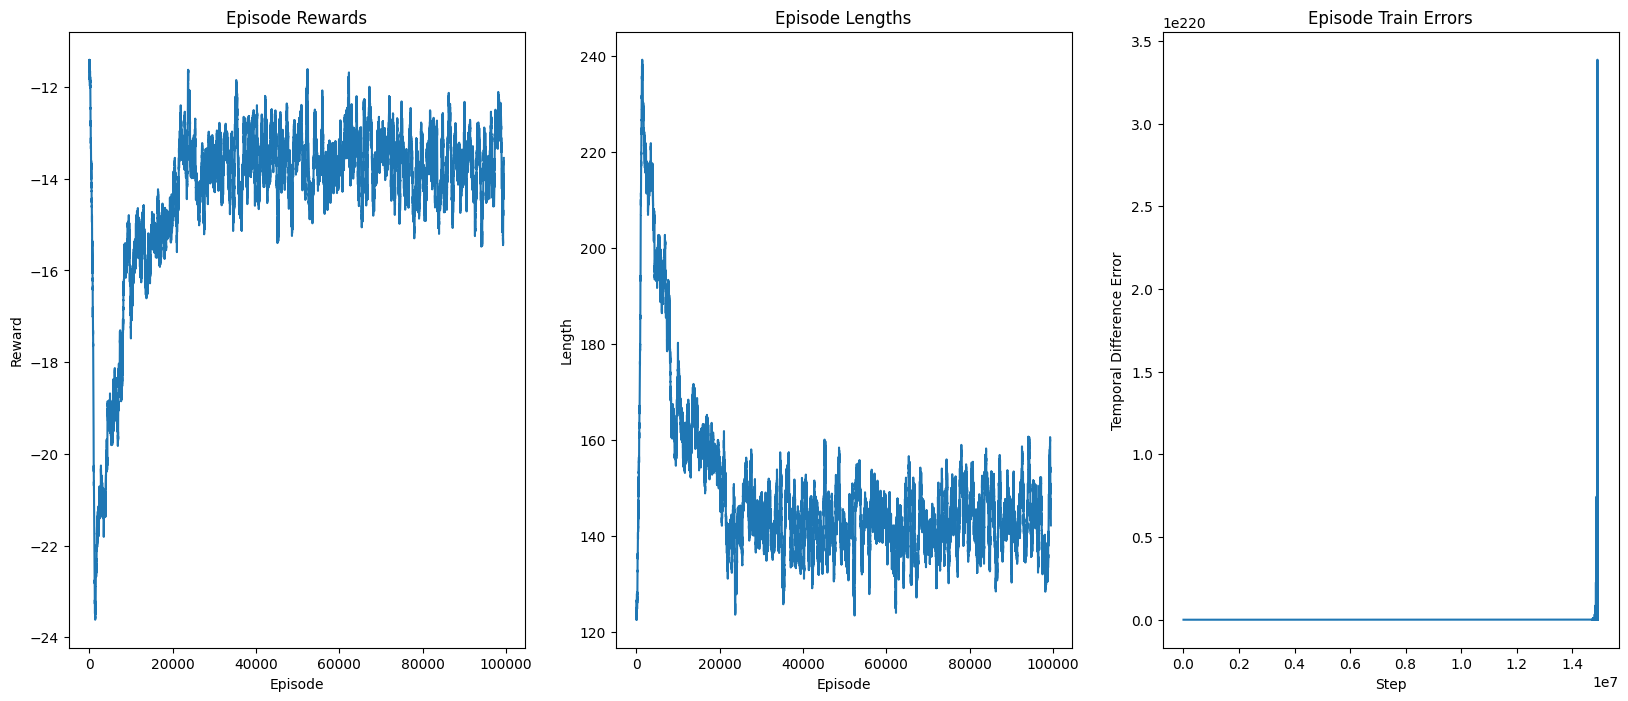

In [ ]:
plot_smooth_curve(chaser, train_env, smoothing_window=500)